In [1]:
from bs4 import BeautifulSoup
import requests
import urllib.request
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from html_table_parser.parser import HTMLTableParser
from pprint import pprint

In [3]:
url="https://results.eci.gov.in/PcResultGenJune2024/index.htm"


In [4]:
page = requests.get(url)

soup = BeautifulSoup(page.content, "html.parser")

In [5]:
table=soup.find("table", class_="table")
table_r=table.find_all("tr", class_="tr")

In [6]:
won={}
for ele in table_r:
    name=ele.find("td")
    w=ele.find("a")
    won[name.text.strip()]=[int(w.text.strip())]
won_df = pd.DataFrame(won)
won_df

,Bharatiya Janata Party - BJP,Indian National Congress - INC,Samajwadi Party - SP,All India Trinamool Congress - AITC,Dravida Munnetra Kazhagam - DMK,Telugu Desam - TDP,Janata Dal (United) - JD(U),Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,Nationalist Congress Party – Sharadchandra Pawar - NCPSP,Shiv Sena - SHS,...,Shiromani Akali Dal - SAD,Rashtriya Loktantrik Party - RLTP,Bharat Adivasi Party - BHRTADVSIP,Sikkim Krantikari Morcha - SKM,Marumalarchi Dravida Munnetra Kazhagam - MDMK,Aazad Samaj Party (Kanshi Ram) - ASPKR,Apna Dal (Soneylal) - ADAL,AJSU Party - AJSUP,All India Majlis-E-Ittehadul Muslimeen - AIMIM,Independent - IND
0,240,99,37,29,22,16,12,9,8,7,...,1,1,1,1,1,1,1,1,1,7


In [7]:
won_df.to_csv("Won_result.csv")

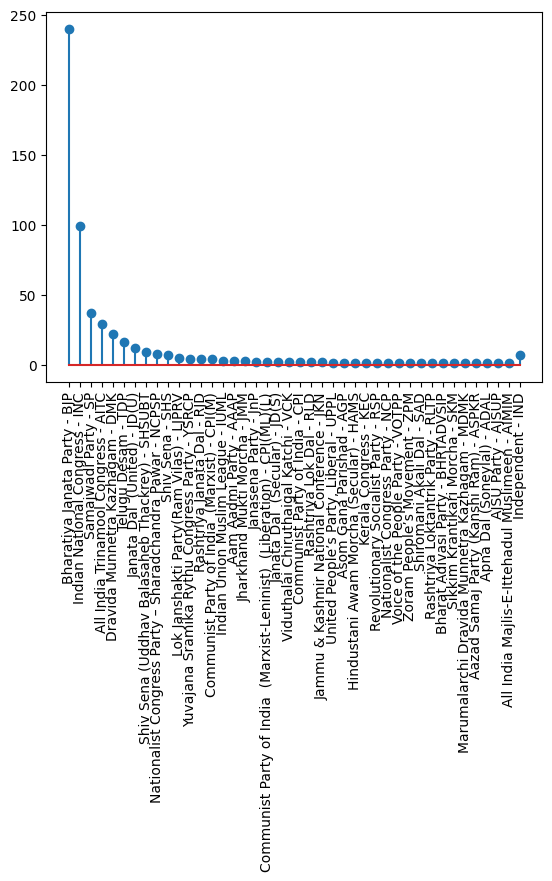

In [8]:
fig, ax = plt.subplots() 
ax.stem(won.keys(),won.values())
plt.xticks(rotation=90)
plt.show()       

Tamil Nadu Scrape

In [9]:
#### Tamil nadu
url= "https://results.eci.gov.in/PcResultGenJune2024/statewiseS222.htm"

In [10]:
def get_state_data(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    table=soup.find("table", class_="table table-striped table-bordered") #<table class="table table-striped table-bordered">
    table_r=table.find_all("th")
    headings = [i.text for i in table_r]
    headings.pop(0)
    headings.pop(-1)
    table_r = table.find_all("tr")
    TN_list=[]
    for i in table_r:
        ele = i.find_all("td")
        row=[ i.text for i in ele]
        
        TN_list.append(row)
    
    print(len(TN_list[2]),len(TN_list[4]))
    return headings,TN_list

headings,TN_list = get_state_data(url)
headings

30 3


['Constituency  ',
 'Const. No.',
 'Leading Candidate ',
 'Leading Party ',
 'Trailing Candidate ',
 'Trailing Party ',
 'Margin ',
 'Status']

In [11]:
TN_list

[[],
 [],
 ['NILGIRIS',
  '19',
  'RAJA A',
  'Dravida Munnetra KazhagamiParty Wise State TrendsLeading In:0Won In:22Trailing In:0',
  'Dravida Munnetra Kazhagam',
  'iParty Wise State TrendsLeading In:0Won In:22Trailing In:0',
  'Leading In',
  ':',
  '0',
  'Won In',
  ':',
  '22',
  'Trailing In',
  ':',
  '0',
  'DR MURUGAN L',
  'Bharatiya Janata Party\niParty Wise State TrendsLeading In:0Won In:0Trailing In:0\n\n',
  'Bharatiya Janata Party',
  'iParty Wise State TrendsLeading In:0Won In:0Trailing In:0\n\n',
  'Leading In',
  ':',
  '0',
  'Won In',
  ':',
  '0',
  'Trailing In',
  ':',
  '0',
  '240585',
  'Result Declared'],
 ['Dravida Munnetra Kazhagam',
  'iParty Wise State TrendsLeading In:0Won In:22Trailing In:0',
  'Leading In',
  ':',
  '0',
  'Won In',
  ':',
  '22',
  'Trailing In',
  ':',
  '0'],
 ['Leading In', ':', '0'],
 ['Won In', ':', '22'],
 ['Trailing In', ':', '0'],
 ['Bharatiya Janata Party',
  'iParty Wise State TrendsLeading In:0Won In:0Trailing In:0\n\n',
 

In [12]:
def clean_to_list(s_list):
    res=[]
    for i in s_list:
        try:
            if i==[] or i[2]=='Leading In' or i[0] == 'Leading In' or i[0]== 'Won In' or i[0]=='Trailing In':
                pass
            else:
                res.append(i)
        except:
            pass
    print(len(res))
    constituncy_list_tn=[[i[0],i[1],i[2],i[4],i[11],i[15],i[17],i[28]] for i in res]
    return constituncy_list_tn
    
TN_list= clean_to_list(TN_list)
TN_list

19


[['NILGIRIS',
  '19',
  'RAJA A',
  'Dravida Munnetra Kazhagam',
  '22',
  'DR MURUGAN L',
  'Bharatiya Janata Party',
  '240585'],
 ['PERAMBALUR',
  '25',
  'ARUN NEHRU',
  'Dravida Munnetra Kazhagam',
  '22',
  'CHANDRAMOHAN N D',
  'All India Anna Dravida Munnetra Kazhagam',
  '389107'],
 ['POLLACHI',
  '21',
  'ESWARASAMY K',
  'Dravida Munnetra Kazhagam',
  '22',
  'KARTHIKEYAN A',
  'All India Anna Dravida Munnetra Kazhagam',
  '252042'],
 ['RAMANATHAPURAM',
  '35',
  'NAVASKANI K',
  'Indian Union Muslim League',
  '1',
  'PANNEERSELVAM O S/O OTTAKARATHEVAR',
  'Independent',
  '166782'],
 ['SALEM',
  '15',
  'SELVAGANAPATHI T M',
  'Dravida Munnetra Kazhagam',
  '22',
  'VIGNESH P',
  'All India Anna Dravida Munnetra Kazhagam',
  '70357'],
 ['SIVAGANGA',
  '31',
  'KARTI P CHIDAMBARAM',
  'Indian National Congress',
  '9',
  'XAVIERDASS A',
  'All India Anna Dravida Munnetra Kazhagam',
  '205664'],
 ['SRIPERUMBUDUR',
  '5',
  'T R BAALU',
  'Dravida Munnetra Kazhagam',
  '22',


In [13]:
header = ['Constituency','Const. No.','Leading Candidate','Leading Party','Won','Trailing Candidate','Trailing Party','Margin']
TN_df = pd.DataFrame(TN_list,columns=header)
TN_df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Won,Trailing Candidate,Trailing Party,Margin
0,NILGIRIS,19,RAJA A,Dravida Munnetra Kazhagam,22,DR MURUGAN L,Bharatiya Janata Party,240585
1,PERAMBALUR,25,ARUN NEHRU,Dravida Munnetra Kazhagam,22,CHANDRAMOHAN N D,All India Anna Dravida Munnetra Kazhagam,389107
2,POLLACHI,21,ESWARASAMY K,Dravida Munnetra Kazhagam,22,KARTHIKEYAN A,All India Anna Dravida Munnetra Kazhagam,252042
3,RAMANATHAPURAM,35,NAVASKANI K,Indian Union Muslim League,1,PANNEERSELVAM O S/O OTTAKARATHEVAR,Independent,166782
4,SALEM,15,SELVAGANAPATHI T M,Dravida Munnetra Kazhagam,22,VIGNESH P,All India Anna Dravida Munnetra Kazhagam,70357


In [14]:
url="https://results.eci.gov.in/PcResultGenJune2024/statewiseS221.htm"
heading,TN_list_2=get_state_data(url)
TN_list_2=clean_to_list(TN_list_2)
df=pd.DataFrame(TN_list_2,columns=header)
TN_df = pd.concat([df,TN_df], ignore_index=True)
#TN_df.to_csv("TN_result.csv")

30 3
20


Kerala

In [15]:
url="https://results.eci.gov.in/PcResultGenJune2024/statewiseS111.htm"
heading,kl_list=get_state_data(url)
kl_list=clean_to_list(kl_list)
kl_df = pd.DataFrame(kl_list,columns=header)
#kl_df.to_csv("KL_results.csv")

30 3
20


In [16]:
url="https://results.eci.gov.in/PcResultGenJune2024/statewiseS241.htm"
heading,up_list=get_state_data(url)
up_list=clean_to_list(up_list)
up_df = pd.DataFrame(up_list,columns=header)
url="https://results.eci.gov.in/PcResultGenJune2024/statewiseS242.htm"
heading,up_list2=get_state_data(url)
up_list2=clean_to_list(up_list2)
df = pd.DataFrame(up_list2,columns=header)
up_df = pd.concat([up_df,df], ignore_index=True)
url="https://results.eci.gov.in/PcResultGenJune2024/statewiseS243.htm"
heading,up_list3=get_state_data(url)
up_list3=clean_to_list(up_list3)
df = pd.DataFrame(up_list3,columns=header)
up_df = pd.concat([up_df,df], ignore_index=True)
url="https://results.eci.gov.in/PcResultGenJune2024/statewiseS244.htm"
heading,up_list4=get_state_data(url)
up_list4=clean_to_list(up_list4)
df = pd.DataFrame(up_list4,columns=header)
up_df = pd.concat([up_df,df], ignore_index=True)
#up_df.to_csv("UP_results.csv")
up_df.head()

30 3
20
30 3
20
30 3
20
30 3
20


,Constituency,Const. No.,Leading Candidate,Leading Party,Won,Trailing Candidate,Trailing Party,Margin
0,Agra,18,PROF S P SINGH BAGHEL,Bharatiya Janata Party,33,SURESH CHAND KARDAM,Samajwadi Party,271294
1,Akbarpur,44,DEVENDRA SINGH ALIAS BHOLE SINGH,Bharatiya Janata Party,33,RAJARAM PAL,Samajwadi Party,44345
2,Aligarh,15,SATISH KUMAR GAUTAM,Bharatiya Janata Party,33,BIJENDRA SINGH,Samajwadi Party,15647
3,Allahabad,52,UJJWAL RAMAN SINGH,Indian National Congress,6,NEERAJ TRIPATHI,Bharatiya Janata Party,58795
4,Ambedkar Nagar,55,LALJI VERMA,Samajwadi Party,37,RITESH PANDEY,Bharatiya Janata Party,137247


In [17]:
url = "https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-369.htm"
def get_party_data(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    table=soup.find("tbody")
    table_r=table.find_all("tr")
    p_list=[]
    for i in table_r:
        ele = i.find_all('td')
        row=[j.text for j in ele]
        p_list.append(row)
    return p_list
header_party=["S.No","Parliament Constituency","Winning Candidate","Total Votes","Margin"]
bjp_list=get_party_data(url)
bjp_df = pd.DataFrame(bjp_list,columns=header_party)
#bjp_df.to_csv("bjp.csv")

In [18]:
url="https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-742.htm"
congress_list = get_party_data(url)
congress_list = pd.DataFrame(congress_list,columns=header_party)
#congress_list.to_csv("congress.csv")

In [19]:
url="https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1680.htm"
sj_list = get_party_data(url)
sj_list = pd.DataFrame(sj_list,columns=header_party)
#sj_list.to_csv("sjp.csv")

In [20]:
url="https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-582.htm"
dmk_list = get_party_data(url)
dmk_list = pd.DataFrame(dmk_list,columns=header_party)
dmk_list.to_csv("dmk.csv")

In [21]:
url="https://results.eci.gov.in/PcResultGenJune2024/index.htm"
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")
table=soup.find("table", class_="table")
table_r=table.find_all("tr", class_="tr")


In [22]:
links=[]
party_df = pd.DataFrame(columns=header_party)
for i in table_r:
    w=i.find("a",href=True)
    links.append(w['href'])

In [23]:
import time
res=[]
for link in links:
    l = get_party_data(" https://results.eci.gov.in/PcResultGenJune2024/"+link)
    for i in l:
        res.append(i)
    
res

[['1', 'Anakapalle(5)', 'C.M.RAMESH', '762069', '296530'],
 ['2', 'Rajahmundry(8)', 'DAGGUBATI PURANDHESHWARI', '726515', '239139'],
 ['3',
  'Narsapuram(9)',
  'BHUPATHI RAJU SRINIVASA VARMA (B.J.P.VARMA)',
  '707343',
  '276802'],
 ['4', 'Arunachal West(1)', 'KIREN RIJIJU', '205417', '100738'],
 ['5', 'Arunachal East(2)', 'TAPIR GAO', '145581', '30421'],
 ['6', 'Darrang-Udalguri(4)', 'DILIP SAIKIA', '868387', '329012'],
 ['7', 'Guwahati(5)', 'BIJULI KALITA MEDHI', '894887', '251090'],
 ['8', 'Diphu(6)', 'AMARSING TISSO', '334620', '147603'],
 ['9', 'Karimganj(7)', 'KRIPANATH MALLAH', '545093', '18360'],
 ['10', 'Silchar (8)', 'PARIMAL SUKLABAIDYA', '652405', '264311'],
 ['11', 'Kaziranga(10)', 'KAMAKHYA PRASAD TASA', '897043', '248947'],
 ['12', 'Sonitpur(11)', 'RANJIT DUTTA', '775788', '361408'],
 ['13', 'Lakhimpur(12)', 'PRADAN BARUAH', '663122', '201257'],
 ['14', 'Dibrugarh(13)', 'SARBANANDA SONOWAL', '693762', '279321'],
 ['15', 'Paschim Champaran(2)', 'DR.SANJAY JAISWAL', '5804

In [24]:
len(res)
#party_df = pd.DataFrame(res,columns=header_party)
#party_df.to_csv("total_ds.csv")

543

In [32]:
def get_voter_data(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    t=soup.find_all("table",{"class":"Table"})
    f_list=[]
    for j in t:
        table=j.find("tbody")
        table_r=table.find_all("tr")
        p_list=[]
        for i in table_r:
            ele = i.find_all('td')
            row=[j.text.lstrip('\n').rstrip('\n') for j in ele]
            p_list.append(row)
        p_list.pop(0)
        p_list.pop(0)
        p_list.pop(-1)
        f_list.append(p_list)
        
    return f_list
url = "https://pib.gov.in/PressReleaseIframePage.aspx?PRID=2021609"
voter_list = get_voter_data(url)
voter_list

[[['1',
   'Andaman & Nicobar Islands',
   'Andaman & Nicobar Islands',
   '315148',
   '64.10',
   '202018'],
  ['2', 'Arunachal Pradesh', 'Arunachal East', '375310', '83.31', '312658'],
  ['3', 'Arunachal Pradesh', 'Arunachal West', '517384', '73.60', '380783'],
  ['4', 'Assam', 'Dibrugarh', '1659588', '76.75', '1273744'],
  ['5', 'Assam', 'Jorhat', '1727121', '79.89', '1379749'],
  ['6', 'Assam', 'Kaziranga', '2050126', '79.33', '1626408'],
  ['7', 'Assam', 'Lakhimpur', '1577234', '76.42', '1205331'],
  ['8', 'Assam', 'Sonitpur', '1633800', '78.46', '1281959'],
  ['9', 'Bihar', 'Aurangabad', '1871564', '50.35', '942382'],
  ['10', 'Bihar', 'Gaya', '1816815', '52.76', '958623'],
  ['11', 'Bihar', 'Jamui', '1907126', '51.25', '977369'],
  ['12', 'Bihar', 'Nawada', '2006124', '43.17', '866102'],
  ['13', 'Chhattisgarh', 'BASTAR', '1472207', '68.29', '1005392'],
  ['14', 'Jammu and Kashmir', 'UDHAMPUR', '1623195', '68.27', '1108206'],
  ['15', 'Lakshadweep', 'Lakshadweep', '57784', '84.

In [33]:
res=[]
for i in voter_list:
    for j in i:
        res.append(j)
voter_list=res
voter_df = pd.DataFrame(res,columns=["Sl.No","State","PC Name","Count of Elector","Poll(%)","Count of Votes"])

In [35]:
voter_df.head()
voter_df.to_csv("voter_list.csv")